<div><img src="oslo_fram_round.png" height=50 width=50 align="left"></div><div style="margin-left:70px"><h1>$\mathrm{Oslo}_{\mathrm{MS}}$ - April</h1></div>

$\mathrm{Oslo}_{\mathrm{MS}}$ is an **O**pportunity for (Semi)-**S**upervised **L**earning **O**f **M**athematics and **S**tatistics.

# Format

* Every month a mathematical/statistical theme is proposed by the *supervisor*.
* A set of lines of investigation around the theme is proposed, along with reading material.
* For every line of investigation, at least 1 programming exercise is proposed.
* Free exploration and additional self-thought lines/exercises are encouraged.
* Starting from a duplication of Jupyter notebook, material is worked through and enriched by *learner*.
* After the *learner* is satisfied with the results of his $\mathrm{Oslo}_{\mathrm{MS}}$ activities, a review session with *supervisor* is scheduled.

## General references

* [LAS] Linear Algebra by G Strang (in folder `P:\Development\oslo\references`)
* [MML] [Mathematics for Machine Learning](https://mml-book.github.io/) (pdf [here](https://mml-book.github.io/book/mml-book.pdf))
* [PRML] [Pattern Recognition and Machine Learning by C Bishop](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)

# April Theme - Weight

* it is a positive (or zero) scalar value (i.e. a single real number).
  The word *scalar* is used is to emphasize that it will be used to multiply a *vector* (to produce a new vector).
  
(*what is a vector, by the way?*)

*Answer*: A vector is an array of numbers, each number represents how far it stretches the space on the direction of the baisis vectors. A vector can represent direction and speed, position in a space, a combination of features and more. 

#### question

Examples of weights that you know of?

*Answer*: weighted average, weightd sum

## normalizing weights

* often a series of weights $w_i$ (with $i=1 \ldots n$) is *normalized*, that is, for all $i$, $0 \leq w_i \leq 1$ and
  $\sum w_i = 1$.
* if a series of weights $w_i'$ is not normalized, how can you obtain a series of normalized weights proportional to the original series of weight?

### exercise

In [2]:
from typing import List
import random
import math
import numpy as np

implement a function that passes tests:

In [3]:
def normalize(weights: List[float]) -> List[float]:
    # fix the implementation
    w = np.array(weights)
    if w.min() < 0:
        raise ValueError('Weights can not be negative!')
    return w / w.sum()

In [4]:
normalize([1.0,2.0,3.0,4.0])

array([ 0.1,  0.2,  0.3,  0.4])

tests:

In [5]:
def check(weights: List[float], normalized: List[float]) -> bool:
    if len(weights) != len(normalized):
        return False
    if not math.isclose(sum(normalized), 1):
        return False
    for w in normalized:
        if w < 0 or w > 1:
            return False
    c = None
    for i in range(len(weights)):
        if weights[i] != 0 and c is None:
            c = normalized[i] / weights[i]
        if c is not None and not math.isclose(c*weights[i], normalized[i]):
            return False
    return True

In [6]:
test_vectors = [
    # add your own!
    [0.5, 0.5],
    [1, 2, 3, 4, 5],
    [1, 0, 0, 1, 1],
    [0.5, 0.3, 0.3],
    [random.uniform(0, 1000) for _ in range(1000)],
    [1, 1000, 1000_000, 1000_000_000],
    [0.6, 100.0, 12, -2.0, 3456.0]
]

In [7]:
for i, test in enumerate(test_vectors):
    print(i, end=": ")
    assert check(test, normalize(test))
    print("ok")

0: ok
1: ok
2: ok
3: ok
4: ok
5: ok
6: 

ValueError: Weights can not be negative!

## optimal weight for a mixture of two vectors

For two vectors $v$ and $w$ a mixture of $v$ and $w$ is a weighted averaged $\alpha \cdot v + (1- \alpha) w$
with $0 \leq \alpha \leq 1$.

### exercise

Suppose $f_1$ and $f_2$ are two competing time series forecast over a period (represented as vectors), where the demand is given by $d$. 

Can you find an optimal mixture (the optimal weight $\alpha$) of $f_1$ and $f_2$ that minimizes root mean squared error?

Implement a function that does it and test it in a few cases.


### Notes

When you know you have only one minimum, you can compute the direvitive 0 and find that minimum

*Answer*:

$rmse(\alpha) = \sqrt{\frac{1}{n} \sum{[\alpha f_n + (1 - \alpha) g_n - d_n]^2}}$

$r'(\alpha) = \frac{1}{n \sqrt{h}} \sum{(f_n - g_n)^2\alpha + (f_n - g_n)(g_n - d_n)}$

$\sum{(f_n - g_n)^2\alpha + (f_n - g_n)(g_n - d_n)} = 0$

$\alpha = - \frac{\sum{(f_n - g_n)(g_n - d_n)}}{\sum{(f_n - g_n)^2}}$

In [39]:
d = np.random.randint(low=0, high=100, size=(10,))
f = d - 0.7 * d
g = (d - 0.3 * f) / 0.7 # set alpha to 0.3

print(f'd: {d}')
print(f'f: {f}')
print(f'g: {g}')

def compute_alpha(f: np.ndarray, g: np.ndarray, d: np.ndarray):
    numerator = -1 * ((f - g) * (g - d)).sum()
    denominator = ((f - g)**2).sum()
    return numerator / denominator

compute_alpha(f, g, d)

d: [98 23 19 85 47  6 68 73 24 47]
f: [ 29.4   6.9   5.7  25.5  14.1   1.8  20.4  21.9   7.2  14.1]
g: [ 127.4   29.9   24.7  110.5   61.1    7.8   88.4   94.9   31.2   61.1]


0.30000000000000004

## exponential smoothing

* exponential smoothing is a simple but effective tecnique to smooth time series.
* exponential smoothing is a **weighted** average of past observations and is usually a better alternative to a moving average.
* exponential smoothing depends on a coefficient $\alpha$

### exercise

* look up definition of exponential smoothing
* implement exponential smoothing and moving average for a time series and compare the two on one or more examples (with a plot)
* bonus: look up and implement double exponential smoothing (which is a very basic version of forecasting in SO99+)

In [1]:
import pandas as pd
import numpy as np
import altair as alt
%matplotlib inline

url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
full_data = pd.read_csv(url, sep=',')
full_data.drop(['Wind', 'Solar', 'Wind+Solar'], axis=1, inplace=True)
full_data['Date'] = pd.to_datetime(full_data.Date)
full_data.set_index('Date', inplace=True)
data = full_data['2006'].copy()
data.head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


In [2]:
def moving_average(series: np.ndarray, w_size: int):
    i = w_size
    o = np.full(series.shape, np.nan)
    while i < len(series) - w_size:
        o[i] = series[i-w_size:i+w_size+1].mean()
        i += 1
    return o

def ses(series: np.ndarray, alpha: float):
    assert 0 < alpha < 1
    l_prev = series.mean()
    l = np.zeros_like(series)
    f = np.zeros_like(series)
    for i,y in enumerate(series):
        f[i] = l_prev
        l_prev = alpha * y + (1 - alpha) * l_prev
        l[i] = l_prev
    return l, f

def des(series: np.ndarray, alpha: float, beta: float, h: int = 1):
    assert 0 < alpha < 1
    assert 0 < beta < 1
    l_prev = series.mean()
    print(f'l_0 = {l_prev}')
    b_prev = series[0] - l_prev
    l = np.zeros_like(series)
    b = np.zeros_like(series)
    f = np.zeros_like(series)
    for i,y in enumerate(series):
        f[i] = l_prev + h * b_prev
        l[i] = alpha * y + (1 - alpha) * (l_prev + b_prev)
        b[i] = beta * (l[i] - l_prev) + (1 - beta) * b_prev
        l_prev, b_prev = l[i], b[i]
    return l, b, f   

In [6]:
# Single exponential smoothing
data['MA'] = moving_average(data.Consumption, 7)
level, forecast = ses(data.Consumption, 0.8)
data['L'] = level
data['F'] = forecast

source = data.drop('L', axis=1).transpose().stack().reset_index().rename(columns={'level_0': 'type', 0: 'value'})

alt.Chart(source).mark_line().encode(
    x='Date',
    y='value',
    color='type',
    strokeDash='type',
).properties(
    width=800,
    height=300
).interactive()

alt.Chart(...)

In [7]:
# Double exponential smoothing
data = full_data[:'2006-12-31'].copy()
level, trend, forecast = des(data.Consumption, alpha=0.8, beta=0.01, h=1)
data['L'] = level
data['T'] = trend
data['F'] = forecast

source = data.drop('L', axis=1).transpose().stack().reset_index().rename(columns={'level_0': 'type', 0: 'value'})

alt.Chart(source).mark_line().encode(
    x='Date',
    y='value',
    color='type',
    strokeDash='type',
).properties(
    width=800,
    height=300
).interactive()

l_0 = 1339.9137972602741


alt.Chart(...)

## distribute balls into boxes according to weights

* Look up the implementation of `tgmle.utils.clust_utils.balls_in_boxes`.


### exercise

* Can you find test vectors for that function that would give full test coverage?

Current tests does not cover following lines in `clust_utils.py`: 128, 130, 132, 134, 136, 142 and 174; which are mostly special case checks. 

1. The one on line 142 feels impossible to reach, it requres `num_balls==0 and zero_allowed=True`, which must be at least second call of the `balls_in_boxes` function with input balls to be 0. However, if that's the case, it will not enter the second call.
2. The one on line 174 should never be reached since balls are distributed by `floor()`, so `sum(dist_balls) < num_balls`.


* The function is recursive (through function `update_call`). Can you find an example where the recursion is called at least 3 times? 10 times?

I think most cases (except special cases with even weights sum to number of balls `3, [1,1,1]`) will be calling the function `balls_in_boxes()` 3 times. For instance `10, [1,2,3]`

1. Distribute 1 per box: `[1,1,1]`
2. Distribute `(7 * 1) // 6`, `(7 * 2) // 6`, and `(7 * 3) // 6`
3. Distribute whatever is left.

However, the 2nd call should almost fill the boxes with some residual to be distributed in the 3rd call, so I don't see any case can be called even 4th time.


In [8]:
import random

def dist_balls(num_balls: int, size_boxes: list, seed=42):
    random.seed = seed
    boxes = list(range(len(size_boxes)))
    weights = [w/sum(size_boxes) for w in size_boxes]
    dist_balls = [int(num_balls*w) for w in weights]
    left_balls = num_balls - sum(dist_balls)
    for i in range(left_balls):
        x = random.choices(boxes, weights=weights)[0]
        dist_balls[x] += 1
    return dist_balls

In [9]:
dist_balls(10, [1, 2, 3])

[1, 3, 6]

This approch by randomly select box according to size is not deterministic, all left balls could end up in the same box. The core idea behind this is regard `size_boxes` as porpotion that describes the relation between box sizes, which can be scaled up and down as long as one is always, say 3 times bigger than another.

## weights and linear algebra

* statement: a set of vectors a linearly dependent if there is a set of weights not all zero for which the vector obtained by linear combination of vectors and weight is the zero vector

### exercise

* look up chapter 2.3 in [LAS] reference above and pick up some exercise to perform.

## probabilities as weights

* a probability $p$ is a value between $0$ and $1$. Probabilities can be thought as weights!

### exercise

* what is the expectation of a random variable in terms of weights?

0.5?

* simulate a random walk in the plane where starting from $(0, 0)$ every successive step is taken according to one of two probabilistic rules:

    A. (pawn) step is drawn between $(0, 1), (1, 1), (-1, 1)$. Suppose that i) probabilty to go forward is 4 times the probability to go in a diagonal direction and that ii) probability for the pawn to go towards right is 2 times the probabilty to go towards left.
    
    B. (backward horse) step is drawn between $(-1, -2), (-2, -1), (2, -1), (1, -2)$. Suppose that probabilty to take a shorter step backward is 3 times the probabilty of taking a longer step backward and that the probabilty of going towards left is 9 times higher than the probability of going right.


* derivate the probabilities for each vector of rule A starting from "non normalized" probabilities and using normalize function you implemented (e.g. let's assign 1 to "probability" of vector $(1, 1)$ and draw consequences for other probabilties).
* do the same for rule B (are the constraint enough to compute the probabilities? if not add a constraint).
* simulate the random walk for 1000 steps assuming that at every step we pick between rule A and rule B according to a flip of a fair coin. Make a plot. What is the expected position?
* what would be the optimal mixture of rules in order to have the expected position to be always the origin (independently of the number of steps?).

In [33]:
import numpy as np

A = np.array(
    [[0, 1],
     [1, 1],
     [-1, 1]]
)

wa = np.array([12, 2, 1])
wa = wa / wa.sum()
print(f'wa: {wa}')

B = np.array(
    [[-1, -2],
     [-2, -1],
     [2, -1], 
     [1, -2]]
)

wb = np.array([27, 9, 1, 3])
wb = wb / wb.sum()
print(f'wb: {wb}')

ea = (A * wa.reshape(-1, 1)).sum(axis=0)
print(f'ea: {ea}')

eb = (B * wb.reshape(-1, 1)).sum(axis=0)
print(f'eb: {eb}')

E = ea * 0.5 + eb * 0.5
print(f'E = 0.5*ea + 0.5*eb: {E}')
print(f'E*1000: {E*1000}')

wa: [ 0.8         0.13333333  0.06666667]
wb: [ 0.675  0.225  0.025  0.075]
ea: [ 0.06666667  1.        ]
eb: [-1.   -1.75]
E = 0.5*ea + 0.5*eb: [-0.46666667 -0.375     ]
E*1000: [-466.66666667 -375.        ]


In [34]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
%matplotlib inline

def pawn(start):
    A = np.array(
        [[0, 1],
         [1, 1],
         [-1, 1]]
    )
    wa = np.array([12, 2, 1])
    wa = wa / wa.sum()
    move = A[np.random.choice(range(len(A)), p=wa)]
    return start + move

def horse(start):
    B = np.array(
        [[-1, -2],
         [-2, -1],
         [2, -1], 
         [1, -2]]
    )
    wb = np.array([27, 9, 1, 3])
    wb = wb / wb.sum()
    move = B[np.random.choice(range(len(B)), p=wb)]
    return start + move

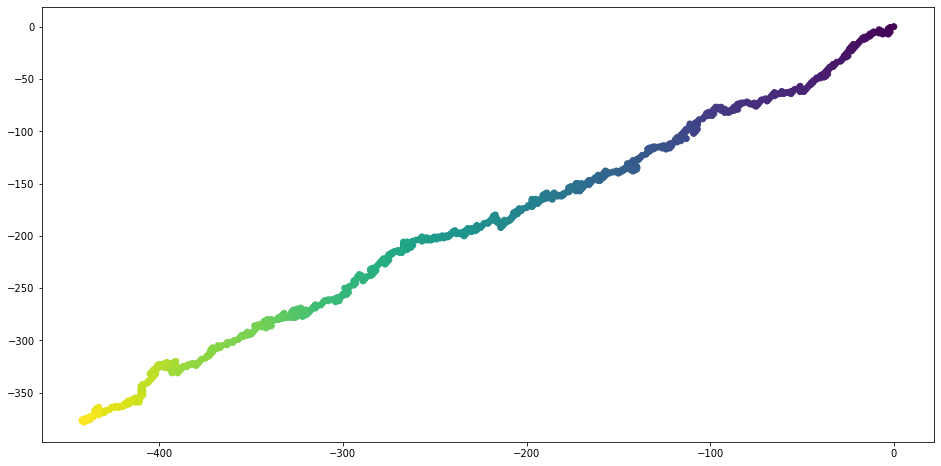

In [35]:
record = np.array([[0,0]])
moves = {0: pawn, 1: horse}
color = [0]

for i in range(1000):
    move = moves[np.random.choice([0, 1], p=[1/2, 1/2])]
    target = move(record[i])
    record = np.vstack([record, target])
    color.append(i+1)

fig, axes = plt.subplots(1, 1, figsize=(16, 8))
axes.scatter(record[:,0], record[:,1], c=color)